# Day 11 - Handling Missing Data

In [5]:
import numpy as np
import pandas as pd

### NaN and None in Pandas

``NaN`` and ``None`` both have their place, and Pandas is built to handle the two of them nearly interchangeably, converting between them where appropriate:

In [6]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [7]:
1 + np.nan

nan

In [8]:
1 + None

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

## Operating on Null Values

- ``isnull()``: Generate a boolean mask indicating missing values
- ``notnull()``: Opposite of ``isnull()``
- ``dropna()``: Return a filtered version of the data
- ``fillna()``: Return a copy of the data with missing values filled or imputed


### Detecting null values
Pandas data structures have two useful methods for detecting null data: ``isnull()`` and ``notnull()``.
Either one will return a Boolean mask over the data. For example:

In [9]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [10]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [11]:
data[data.notnull()]

0        1
2    hello
dtype: object

### Dropping null values

In addition to the masking used before, there are the convenience methods, ``dropna()``
(which removes NA values) and ``fillna()`` (which fills in NA values). For a ``Series``,
the result is straightforward:

In [12]:
data.dropna()

0        1
2    hello
dtype: object

In [13]:
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [14]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


We cannot drop single values from a ``DataFrame``; we can only drop full rows or full columns.
Depending on the application, you might want one or the other, so ``dropna()`` gives a number of options for a ``DataFrame``.

By default, ``dropna()`` will drop all rows in which *any* null value is present:

In [15]:
df.dropna()

,0,1,2
1,2.0,3.0,5


Alternatively, you can drop NA values along a different axis; ``axis=1`` drops all columns containing a null value:

In [16]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


But this drops some good data as well; you might rather be interested in dropping rows or columns with *all* NA values, or a majority of NA values.
This can be specified through the ``how`` or ``thresh`` parameters, which allow fine control of the number of nulls to allow through.

The default is ``how='any'``, such that any row or column (depending on the ``axis`` keyword) containing a null value will be dropped.
You can also specify ``how='all'``, which will only drop rows/columns that are *all* null values:

In [17]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [18]:
df.dropna(axis='columns', how='any')

,2
0,2
1,5
2,6


In [19]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


For finer-grained control, the ``thresh`` parameter lets you specify a minimum number of non-null values for the row/column to be kept:

In [20]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [25]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


### Filling null values

Sometimes rather than dropping NA values, you'd rather replace them with a valid value.
This value might be a single number like zero, or it might be some sort of imputation or interpolation from the good values.
You could do this in-place using the ``isnull()`` method as a mask, but because it is such a common operation Pandas provides the ``fillna()`` method, which returns a copy of the array with the null values replaced.

Consider the following ``Series``:

In [26]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [27]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [28]:
data.fillna(data.mean())

a    1.0
b    2.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [29]:
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [30]:
# forward-fill
data.fillna(method='ffill')

C:\Users\skous2\AppData\Local\Temp\ipykernel_44112\3316037056.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill')


a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [31]:
# back-fill
data.fillna(method='bfill')

C:\Users\skous2\AppData\Local\Temp\ipykernel_44112\692461307.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill')


a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [32]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [33]:
df.fillna(0)

,0,1,2,3
0,1.0,0.0,2,0.0
1,2.0,3.0,5,0.0
2,0.0,4.0,6,0.0


In [34]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [35]:
df.fillna(method='ffill', axis=1)

C:\Users\skous2\AppData\Local\Temp\ipykernel_44112\901808322.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', axis=1)


,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


In [36]:
df.fillna(method='ffill', axis=0)

C:\Users\skous2\AppData\Local\Temp\ipykernel_44112\3122255136.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', axis=0)


,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,2.0,4.0,6,NaN


In [37]:
df.replace(np.nan, 7)

,0,1,2,3
0,1.0,7.0,2,7.0
1,2.0,3.0,5,7.0
2,7.0,4.0,6,7.0


In [40]:
#pip install missingno

In [42]:
import missingno as msno

<Axes: >

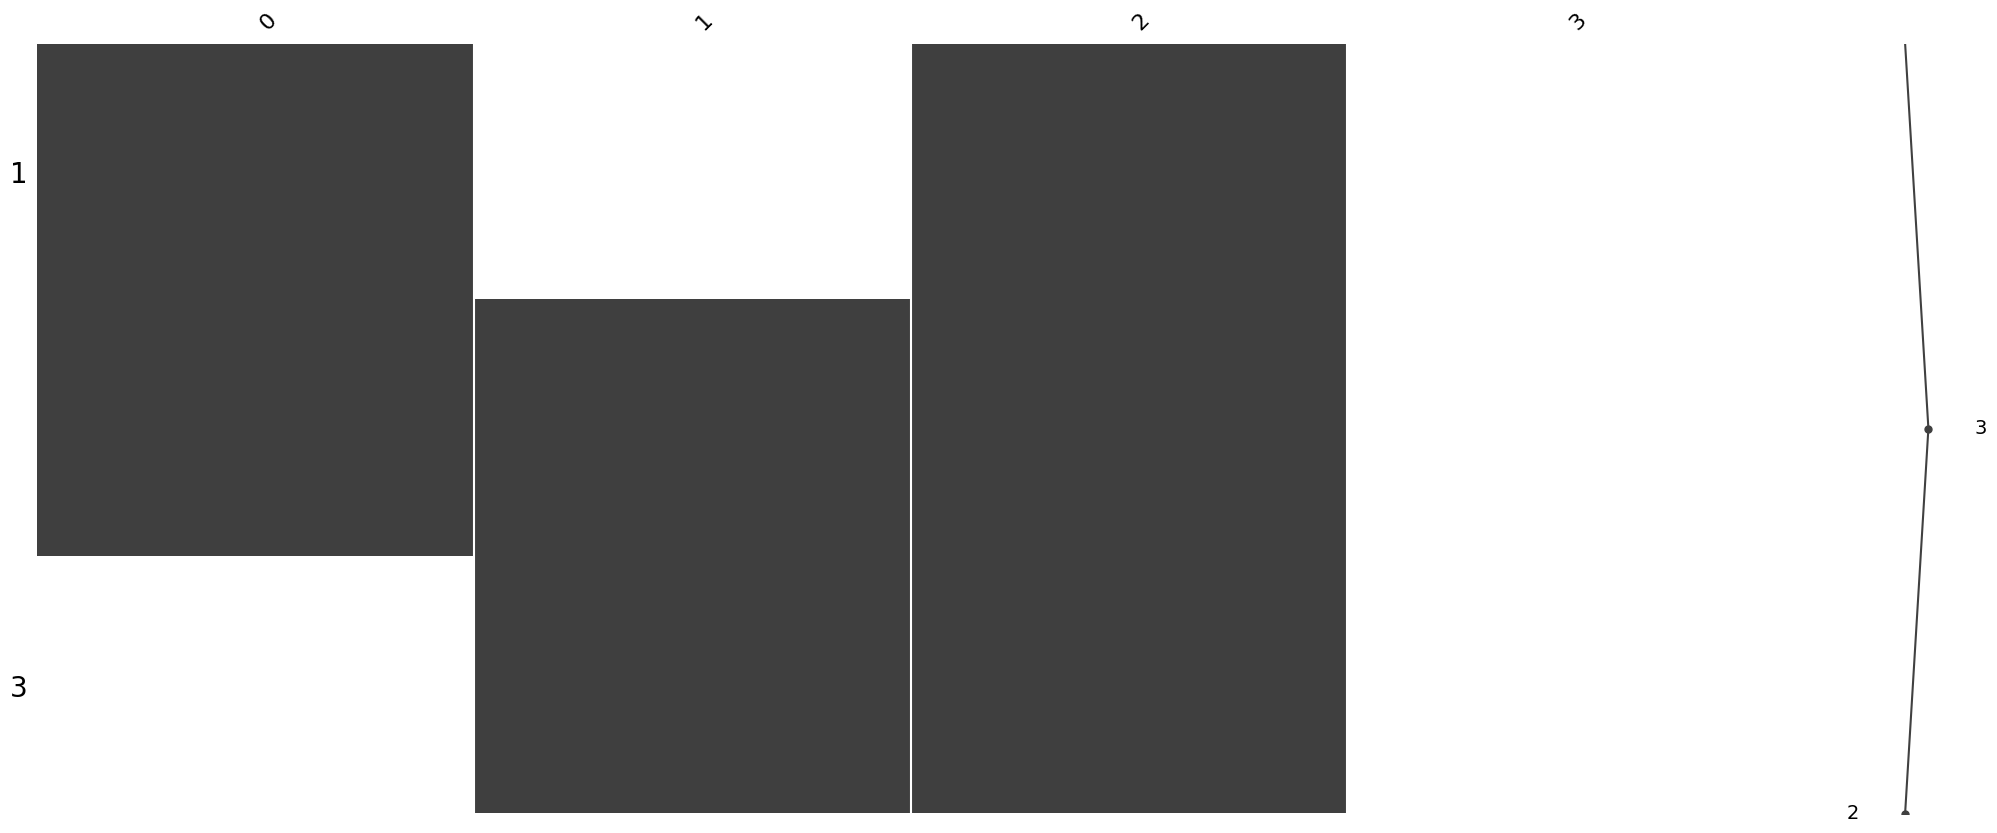

In [43]:
msno.matrix(df)

<Axes: >

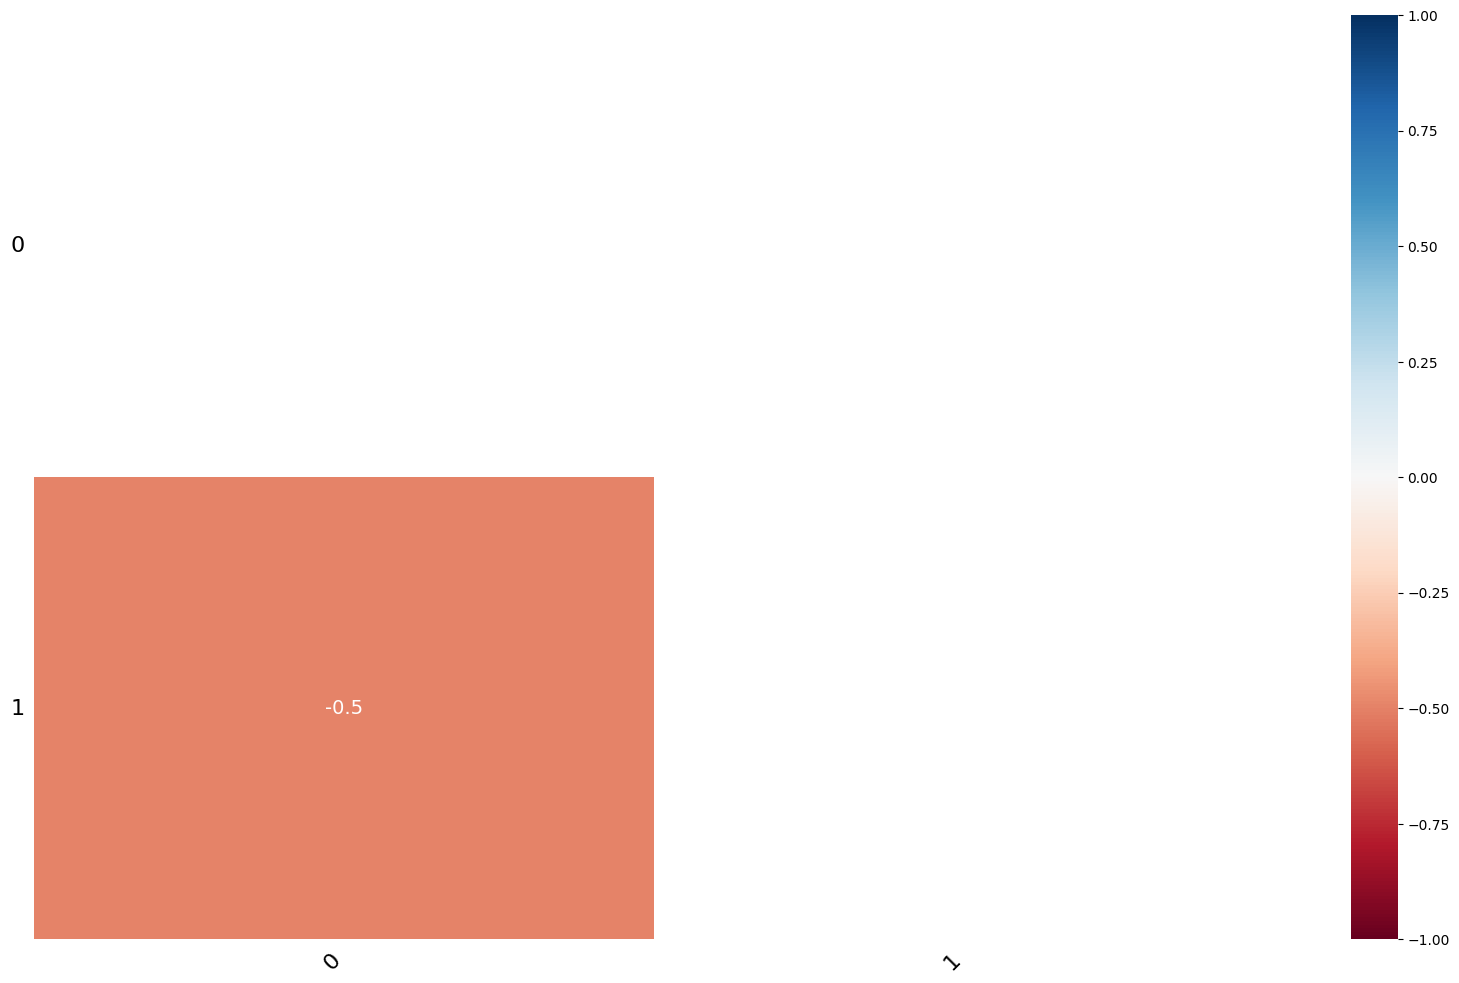

In [44]:
msno.heatmap(df)